In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
import json
with open('/kaggle/input/monkeypox-faqs/intents.json') as file:
    data = json.load(file)

In [3]:
tags = []
inputs = []
responses = {}

for intent in data['intents']:
    responses[intent['tag']]=intent['responses']
    for line in intent['patterns']:
        inputs.append(line)
        tags.append(intent['tag'])

In [4]:
#converting to dataframe

data = pd.DataFrame({"inputs":inputs,"tags":tags})
data

,inputs,tags
0,Hi there,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hola,greeting
...,...,...
80,How long is the recovery time for monkeypox?,recovery
81,what is recovery time for MPX?,recovery
82,Can monkeypox make my pet sick?,pet
83,could my pet monkeypox?,pet


In [5]:
data['inputs'] = data['inputs'].apply(lambda x: x.lower())
data.head()

,inputs,tags
0,hi there,greeting
1,how are you,greeting
2,is anyone there?,greeting
3,hey,greeting
4,hola,greeting


In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
data['inputs']= data['inputs'].apply(lambda x:remove_punctuation(x))
data.tail()

,inputs,tags
80,how long is the recovery time for monkeypox,recovery
81,what is recovery time for mpx,recovery
82,can monkeypox make my pet sick,pet
83,could my pet monkeypox,pet
84,can pets be infected,pet


In [8]:
#Stop word removal: 

import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
for x in ['what','who','how','do']:
    sw.remove(x)

In [10]:
import spacy

#!spacy download en_core_web_sm

#Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [11]:
#Tokenization
def tokenizer(words):
    return [token for token in nlp(words)]

data['tokenizing'] = data['inputs'].apply(tokenizer)
data.head()

,inputs,tags,tokenizing
0,hi there,greeting,"[hi, there]"
1,how are you,greeting,"[how, are, you]"
2,is anyone there,greeting,"[is, anyone, there]"
3,hey,greeting,[hey]
4,hola,greeting,[hola]


In [12]:
def remove_stopwords(text):
    output= [word for word in text if word.text not in sw]
    return output

data['no_stopwords']=data["tokenizing"].apply(lambda x:remove_stopwords(x))
data.sample(5)

,inputs,tags,tokenizing,no_stopwords
72,what are signs of monkeypox,sign,"[what, are, signs, of, monkeypox]","[what, signs, monkeypox]"
67,can kids get this infection,child,"[can, kids, get, this, infection]","[kids, get, infection]"
57,is there a vaccine against monkeypox,vaccine,"[is, there, a, vaccine, against, monkeypox]","[vaccine, monkeypox]"
82,can monkeypox make my pet sick,pet,"[can, monkeypox, make, my, pet, sick]","[monkeypox, make, pet, sick]"
76,what causes monkeypox,cause,"[what, causes, monkeypox]","[what, causes, monkeypox]"


In [13]:
#Lemmatization
def lemmatizer(token):
    return [lem.lemma_ for lem in token]

data['lemmatizaton'] = data['no_stopwords'].apply(lemmatizer)
data.sample(5)

,inputs,tags,tokenizing,no_stopwords,lemmatizaton
82,can monkeypox make my pet sick,pet,"[can, monkeypox, make, my, pet, sick]","[monkeypox, make, pet, sick]","[monkeypox, make, pet, sick]"
77,tell causes of mpx,cause,"[tell, causes, of, mpx]","[tell, causes, mpx]","[tell, cause, mpx]"
22,what help you provide,options,"[what, help, you, provide]","[what, help, provide]","[what, help, provide]"
23,how can you be helpful,options,"[how, can, you, be, helpful]","[how, helpful]","[how, helpful]"
70,is mpx related to covid19,covid,"[is, mpx, related, to, covid19]","[mpx, related, covid19]","[mpx, relate, covid19]"


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

num_words = 1000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

# Tokenize our training data
tokeniser = Tokenizer(num_words=num_words, oov_token=oov_token)
tokeniser.fit_on_texts(data['lemmatizaton'])

In [15]:
from pickle import dump
dump(tokeniser,open('tokeniser.pkl','wb'))

In [16]:
# Get our training data word index
word_index = tokeniser.word_index
word_index

{'<UNK>': 1,
 'monkeypox': 2,
 'what': 3,
 'how': 4,
 'mpx': 5,
 'get': 6,
 'do': 7,
 'who': 8,
 'thank': 9,
 'time': 10,
 'help': 11,
 'make': 12,
 'symptom': 13,
 'tell': 14,
 'spread': 15,
 'person': 16,
 'people': 17,
 'prevent': 18,
 'vaccine': 19,
 'risk': 20,
 'disease': 21,
 'long': 22,
 'pet': 23,
 'helpful': 24,
 'could': 25,
 'transmit': 26,
 'infection': 27,
 'sex': 28,
 'available': 29,
 'human': 30,
 'protect': 31,
 'man': 32,
 'catch': 33,
 'new': 34,
 'relate': 35,
 'covid19': 36,
 'sign': 37,
 'cause': 38,
 'infect': 39,
 'recovery': 40,
 'hi': 41,
 'anyone': 42,
 'hey': 43,
 'hola': 44,
 'hello': 45,
 'good': 46,
 'day': 47,
 'namaste': 48,
 'yo': 49,
 'bye': 50,
 'see': 51,
 'later': 52,
 'goodbye': 53,
 'lose': 54,
 'till': 55,
 'next': 56,
 'bbye': 57,
 'awesome': 58,
 'provide': 59,
 'support': 60,
 'offer': 61,
 'name': 62,
 'design': 63,
 'program': 64,
 'old': 65,
 'age': 66,
 'sexually': 67,
 'sti': 68,
 'deadly': 69,
 'die': 70,
 'dangerous': 71,
 'think': 72

In [17]:
# Encode training data sentences into sequences
train_sequences = tokeniser.texts_to_sequences(data['lemmatizaton'])
train_sequences

[[41],
 [4],
 [42],
 [43],
 [44],
 [45],
 [46, 47],
 [48],
 [49],
 [50],
 [51, 52],
 [53],
 [6, 54],
 [55, 56, 10],
 [57],
 [9],
 [9],
 [24],
 [58, 9],
 [9, 11],
 [4, 25, 11],
 [3, 7],
 [3, 11, 59],
 [4, 24],
 [3, 60, 61],
 [8],
 [3],
 [3, 62],
 [8, 12],
 [8, 63],
 [8, 64],
 [4, 65],
 [12],
 [3, 66],
 [3, 2],
 [3, 5],
 [3, 13, 2],
 [14, 13, 5],
 [4, 2, 15, 16, 16],
 [4, 2, 26],
 [2, 67, 26, 27],
 [2, 68],
 [6, 2, 28],
 [2, 69],
 [17, 70, 2],
 [2, 71],
 [3, 7, 13],
 [3, 7, 72, 73, 2],
 [4, 2, 18],
 [3, 7, 18, 2],
 [3, 7, 74, 6, 2],
 [3, 75, 29, 2],
 [19, 18, 2],
 [2, 15, 76, 30],
 [30, 6, 5, 77],
 [4, 31, 2],
 [4, 31, 78, 5],
 [19, 2],
 [3, 19, 29, 2],
 [32, 8, 28, 32, 79, 20, 33, 2],
 [2, 15, 80, 17],
 [7, 81, 82, 17, 6, 2],
 [2, 83, 33],
 [6, 5],
 [3, 20, 2, 84],
 [3, 85, 20, 86, 87],
 [88, 6, 2],
 [89, 6, 27],
 [2, 34, 21],
 [5, 34, 21],
 [5, 35, 36],
 [2, 35, 36],
 [3, 37, 2],
 [14, 37, 5, 21],
 [90, 91],
 [6, 92, 93, 2],
 [3, 38, 2],
 [14, 38, 5],
 [4, 22, 2, 94],
 [4, 22, 39, 16, 

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Get max training sequence length
maxlen = max([len(x) for x in train_sequences])

# Pad the training sequences
X_train = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

X_train

array([[41,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0],
       [42,  0,  0,  0,  0,  0,  0,  0],
       [43,  0,  0,  0,  0,  0,  0,  0],
       [44,  0,  0,  0,  0,  0,  0,  0],
       [45,  0,  0,  0,  0,  0,  0,  0],
       [46, 47,  0,  0,  0,  0,  0,  0],
       [48,  0,  0,  0,  0,  0,  0,  0],
       [49,  0,  0,  0,  0,  0,  0,  0],
       [50,  0,  0,  0,  0,  0,  0,  0],
       [51, 52,  0,  0,  0,  0,  0,  0],
       [53,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 54,  0,  0,  0,  0,  0,  0],
       [55, 56, 10,  0,  0,  0,  0,  0],
       [57,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0],
       [24,  0,  0,  0,  0,  0,  0,  0],
       [58,  9,  0,  0,  0,  0,  0,  0],
       [ 9, 11,  0,  0,  0,  0,  0,  0],
       [ 4, 25, 11,  0,  0,  0,  0,  0],
       [ 3,  7,  0,  0,  0,  0,  0,  0],
       [ 3, 11, 59,  0,  0,  0,  0,  0],
       [ 4, 24,  0,  0,  0,  0,  0,  0],
       [ 3, 60, 

In [19]:
#encoding the outputs

from sklearn.preprocessing import LabelEncoder

#Instantiate LabelEncoder
le = LabelEncoder()

#Encode single column status
y_train = le.fit_transform(data['tags'])
y_train

array([10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9, 27, 27,
       27, 27, 27, 14, 14, 14, 14, 14,  0,  0,  0, 20, 20, 20,  1,  1,  1,
        7,  7, 26, 26, 25, 25, 23, 23, 23,  6,  6,  6, 17, 17, 19, 19, 19,
       28, 28,  2,  2, 21, 21, 29, 29, 11, 11, 11, 15, 15, 18, 18,  4,  4,
       13, 13,  5,  5, 24, 24, 12, 12,  3,  3,  8,  8, 22, 22, 16, 16, 16])

In [20]:
input_shape = X_train.shape[1]
input_shape

8

In [21]:
#define vocabulary

vocabulary = len(word_index)
print("Number of unique words: ",vocabulary)

Number of unique words:  97


In [22]:
output_length = le.classes_.shape[0]
print("Output length: ",output_length)

Output length:  30


In [23]:
#creating model

from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Flatten
from tensorflow.keras.models import Model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

2022-12-15 08:09:15.694902: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [25]:
train = model.fit(X_train,y_train,epochs=210)

2022-12-15 08:09:16.184590: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/210
3/3 [==============================] - 3s 8ms/step - loss: 3.4009 - accuracy: 0.0353
Epoch 2/210
3/3 [==============================] - 0s 7ms/step - loss: 3.3980 - accuracy: 0.0471
Epoch 3/210
3/3 [==============================] - 0s 7ms/step - loss: 3.3955 - accuracy: 0.0706
Epoch 4/210
3/3 [==============================] - 0s 7ms/step - loss: 3.3929 - accuracy: 0.1294
Epoch 5/210
3/3 [==============================] - 0s 6ms/step - loss: 3.3901 - accuracy: 0.1294
Epoch 6/210
3/3 [==============================] - 0s 6ms/step - loss: 3.3873 - accuracy: 0.1294
Epoch 7/210
3/3 [==============================] - 0s 6ms/step - loss: 3.3839 - accuracy: 0.1059
Epoch 8/210
3/3 [==============================] - 0s 6ms/step - loss: 3.3805 - accuracy: 0.1059
Epoch 9/210
3/3 [==============================] - 0s 6ms/step - loss: 3.3767 - accuracy: 0.1059
Epoch 10/210
3/3 [==============================] - 0s 6ms/step - loss: 3.3721 - accuracy: 0.1059
Epoch 11/210
3/3 [===========

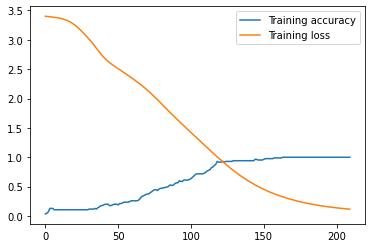

In [26]:
#plotting model accuracy

import matplotlib.pyplot as plt

plt.plot(train.history['accuracy'],label='Training accuracy')
plt.plot(train.history['loss'],label="Training loss")
plt.legend()

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
embedding (Embedding)        (None, 8, 10)             980       
_________________________________________________________________
lstm (LSTM)                  (None, 8, 10)             840       
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                2430      
Total params: 4,250
Trainable params: 4,250
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.save("chatbot.h5")
dump(le,open('le.pkl','wb'))